In [2]:
import util
import torch
import os
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import matplotlib.cm as cm
import warnings
import re
import random
warnings.filterwarnings(action='ignore')

In [3]:
SCORES_BEFORE_PESQ = util.load_variables('variables/SCORES_BEFORE_PESQ.pkl')
SCORES_BEFORE_STOI = util.load_variables('variables/SCORES_BEFORE_STOI.pkl')
SCORES_DNN_PESQ = util.load_variables('variables/SCORES_DNN_PESQ.pkl')
SCORES_DNN_STOI = util.load_variables('variables/SCORES_DNN_STOI.pkl')
SCORES_DNN_WT_PESQ = util.load_variables('variables/SCORES_DNN_TW_PESQ.pkl')
SCORES_DNN_WT_STOI = util.load_variables('variables/SCORES_DNN_TW_STOI.pkl')
PATH_DENOISED_AUDIO_DNN = util.load_variables('variables/PATH_DENOISED_AUDIO_DNN.pkl')

In [4]:
NOISES_DB = []
for i in range(len(PATH_DENOISED_AUDIO_DNN)):
    print(PATH_DENOISED_AUDIO_DNN[i][0].split('/')[1])
    print(PATH_DENOISED_AUDIO_DNN[i][0].split('/')[2])
    NOISES_DB.append([PATH_DENOISED_AUDIO_DNN[i][0].split('/')[1], PATH_DENOISED_AUDIO_DNN[i][0].split('/')[2]])

-9
nonstationary_babycry
-9
nonstationary_crowd_party_adult_med
-9
nonstationary_bell_church
-9
nonstationary_cafeteria_babble
-9
nonstationary_helicopter
-9
nonstationary_people
-9
nonstationary_dog_bark
-9
stationary_pink
-9
stationary_dripping_water
-9
stationary_car
-9
stationary_cabin
-9
stationary_rain
-9
stationary_wind
-9
stationary_typing
-6
nonstationary_babycry
-6
nonstationary_crowd_party_adult_med
-6
nonstationary_bell_church
-6
nonstationary_cafeteria_babble
-6
nonstationary_helicopter
-6
nonstationary_people
-6
nonstationary_dog_bark
-6
stationary_pink
-6
stationary_dripping_water
-6
stationary_car
-6
stationary_cabin
-6
stationary_rain
-6
stationary_wind
-6
stationary_typing
-3
nonstationary_babycry
-3
nonstationary_crowd_party_adult_med
-3
nonstationary_bell_church
-3
nonstationary_cafeteria_babble
-3
nonstationary_helicopter
-3
nonstationary_people
-3
nonstationary_dog_bark
-3
stationary_pink
-3
stationary_dripping_water
-3
stationary_car
-3
stationary_cabin
-3
statio

In [5]:
def get_metrics_for_each_snr(LIST_PESQ, LIST_STOI):
    PESQ_STORE_AVG = []
    STOI_STORE_AVG = []
    for idx, (PESQ, STOI) in enumerate(zip(LIST_PESQ, LIST_STOI)):
        PESQ_AVG = np.sum(np.array(PESQ))/len(np.array(PESQ))
        STOI_AVG = np.sum(np.array(STOI))/len(np.array(STOI))
        PESQ_STORE_AVG.append(PESQ_AVG)
        STOI_STORE_AVG.append(STOI_AVG)
    return PESQ_STORE_AVG, STOI_STORE_AVG

In [6]:
AVG_SNR_SCORES_BEFORE_PESQ, AVG_SNR_SCORES_BEFORE_STOI = get_metrics_for_each_snr(SCORES_BEFORE_PESQ, SCORES_BEFORE_STOI)
AVG_SNR_SCORES_DNN_PESQ, AVG_SNR_SCORES_DNN_STOI = get_metrics_for_each_snr(SCORES_DNN_PESQ, SCORES_DNN_STOI)
AVG_SNR_SCORES_DNN_WT_PESQ, AVG_SNR_SCORES_DNN_WT_STOI = get_metrics_for_each_snr(SCORES_DNN_WT_PESQ, SCORES_DNN_WT_STOI)

In [7]:
#14 NOISES AND [-9, -6, -3, 0, 3, 6, 9]dB 98 for these parameters
len(AVG_SNR_SCORES_BEFORE_PESQ)
print(len(AVG_SNR_SCORES_BEFORE_PESQ))
print(len(AVG_SNR_SCORES_BEFORE_STOI))
print(len(AVG_SNR_SCORES_DNN_PESQ))
print(len(AVG_SNR_SCORES_DNN_STOI))
print(len(AVG_SNR_SCORES_DNN_WT_PESQ))
print(len(AVG_SNR_SCORES_DNN_WT_STOI))
print(len(NOISES_DB))

98
98
98
98
98
98
98


In [8]:
def get_list_dataframe_data(AVG_SNR_SCORES_BEFORE_PESQ, AVG_SNR_SCORES_BEFORE_STOI, AVG_SNR_SCORES_DNN_PESQ, AVG_SNR_SCORES_DNN_STOI, AVG_SNR_SCORES_DNN_WT_PESQ, AVG_SNR_SCORES_DNN_WT_STOI, NOISES_DB):
    dictionary = {}
    for i in range(len(NOISES_DB)):
        #7 because are db levels
        #print(NOISES_DB[i][0])
        #print(NOISES_DB[i][1])
        dictionary[NOISES_DB[i][1]] = []
        #dictionary[NOISES_DB[i][1]].append([AVG_SNR_SCORES_BEFORE_PESQ[i], AVG_SNR_SCORES_BEFORE_STOI[i], AVG_SNR_SCORES_DNN_PESQ[i], AVG_SNR_SCORES_DNN_STOI[i], AVG_SNR_SCORES_DNN_WT_PESQ[i], AVG_SNR_SCORES_DNN_WT_STOI[i]])
    for i in range(len(NOISES_DB)):
        #7 because are db levels
        #print(NOISES_DB[i][0])
        #print(NOISES_DB[i][1])   
        dictionary[NOISES_DB[i][1]].append(
            [[AVG_SNR_SCORES_BEFORE_PESQ[i],
              AVG_SNR_SCORES_DNN_PESQ[i],
              AVG_SNR_SCORES_DNN_WT_PESQ[i]], 
             [AVG_SNR_SCORES_BEFORE_STOI[i],
              AVG_SNR_SCORES_DNN_STOI[i],
              AVG_SNR_SCORES_DNN_WT_STOI[i]]])
    print(dictionary)
    return dictionary
    #for i in range(len(NOISES_DB)):
    #    dictionary[NOISES_DB[i][1]]

In [9]:
scores_per_noise_dictionary = get_list_dataframe_data(AVG_SNR_SCORES_BEFORE_PESQ, AVG_SNR_SCORES_BEFORE_STOI, AVG_SNR_SCORES_DNN_PESQ, AVG_SNR_SCORES_DNN_STOI, AVG_SNR_SCORES_DNN_WT_PESQ, AVG_SNR_SCORES_DNN_WT_STOI, NOISES_DB)

{'nonstationary_babycry': [[[1.302223801612854, 1.7478359866142272, 1.9061050093173981], [0.6638277542591094, 0.8434035414457322, 0.8419227486848831]], [[1.2702758812904358, 1.9147385561466217, 2.0911481380462646], [0.7064057129621506, 0.8689821261167526, 0.867229614853859]], [[1.3630206108093261, 2.0825383603572845, 2.2676428818702696], [0.7491215121746063, 0.8889134150743484, 0.8866300135850906]], [[1.466457439661026, 2.2430695915222167, 2.4376942920684814], [0.7909506207704544, 0.9044016861915588, 0.9010720580816269]], [[1.5834189677238464, 2.4179278945922853, 2.612921583652496], [0.8258623385429382, 0.9174620985984803, 0.9134250396490097]], [[1.7240188360214233, 2.577867720127106, 2.7754479598999025], [0.8608772182464599, 0.9287777537107468, 0.9235474926233291]], [[1.887649232149124, 2.724252963066101, 2.9105082678794862], [0.891630835533142, 0.936711481809616, 0.9307450777292252]]], 'nonstationary_crowd_party_adult_med': [[[1.4207389450073242, 1.2809233725070954, 1.276906270980835

In [10]:
#PESQ_NOISE, STOI_NOISE | PESQ_DENOISE_DNN, STOI_DENOISE_DNN | PESQ_DENOISE_DNN_TW, STOI_DENOISE_DNN_TW
#scores_per_noise_dictionary['nonstationary_babycry']

In [11]:
def generete_dictionary_empty():
    DB_FINALS = [-9, -6, -3, 0, 3, 6, 9]
    dictionary_db = {}
    for i in range(len(DB_FINALS)):
        #7 because are db levels

        #print(NOISES_DB[i][0])
        #print(NOISES_DB[i][1])

        dictionary_db[DB_FINALS[i]] = []
    print(dictionary_db)        
    return dictionary_db


In [12]:
def plot_scores(data, **config):
    plt.style.use('ggplot')
    cmap = cm.get_cmap(config['config']['color'])
    # Convertir la lista en un DataFrame
    df = pd.DataFrame(data, columns=['Speech with noise', 'Speech applying DNN', 'Speech applying DNN + WT'])
    df['Grupo'] = df.index + 1  # Crear una columna para representar los grupos
    # Definir el mapeo de valores
    mapping = {1: '-9 dB', 2: '-6 dB', 3: '-3 dB', 4: '0 dB', 5: '3 dB', 6: '6 dB', 7: '9 dB'}
    # Reemplazar los valores de la columna "Grupo" utilizando el mapeo
    df['Grupo'] = df['Grupo'].map(mapping)
    #print(df['Grupo'])
    # plot the DataFrame
    ax = df.plot(x='Grupo', xlabel='Signal Noise-Ratio', ylabel=config['config']['metric'],
                 kind='bar',
                 stacked=False,
                 title=config['config']['title'] +' '+str(config['config']['noise_type']), cmap=cmap)
    # rotate the x-axis label by 45 degrees
    ax.set_xticklabels(ax.get_xticklabels(), rotation=45)
    #ax.legend(bbox_to_anchor=(1.05, 1), loc=0)
    ax.set_xlabel(ax.get_xlabel(), fontsize=12)#, weight='bold')
    ax.set_ylabel(ax.get_ylabel(), fontsize=12)#, weight='bold')
    ax.set_title(ax.get_title(), fontsize=14, fontfamily='sans-serif')
    # show the plot
    plt.show()

In [13]:
dictionary_pesq = generete_dictionary_empty()
dictionary_stoi = generete_dictionary_empty()

{-9: [], -6: [], -3: [], 0: [], 3: [], 6: [], 9: []}
{-9: [], -6: [], -3: [], 0: [], 3: [], 6: [], 9: []}


nonstationary_babycry
[[1.302223801612854, 1.7478359866142272, 1.9061050093173981], [1.2702758812904358, 1.9147385561466217, 2.0911481380462646], [1.3630206108093261, 2.0825383603572845, 2.2676428818702696], [1.466457439661026, 2.2430695915222167, 2.4376942920684814], [1.5834189677238464, 2.4179278945922853, 2.612921583652496], [1.7240188360214233, 2.577867720127106, 2.7754479598999025], [1.887649232149124, 2.724252963066101, 2.9105082678794862]]


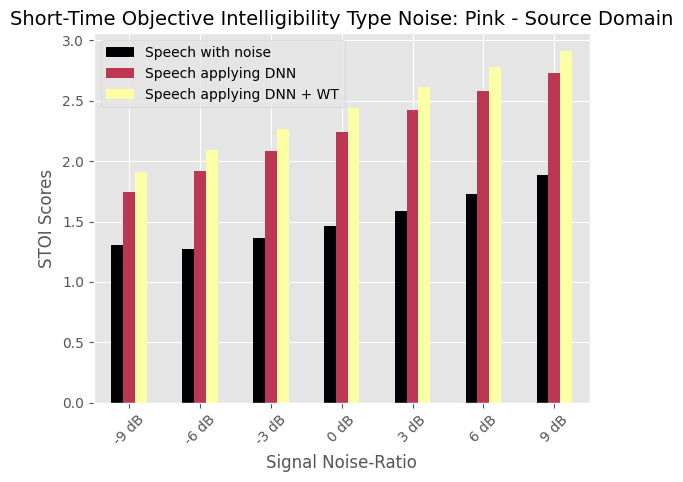

[[0.6638277542591094, 0.8434035414457322, 0.8419227486848831], [0.7064057129621506, 0.8689821261167526, 0.867229614853859], [0.7491215121746063, 0.8889134150743484, 0.8866300135850906], [0.7909506207704544, 0.9044016861915588, 0.9010720580816269], [0.8258623385429382, 0.9174620985984803, 0.9134250396490097], [0.8608772182464599, 0.9287777537107468, 0.9235474926233291], [0.891630835533142, 0.936711481809616, 0.9307450777292252]]


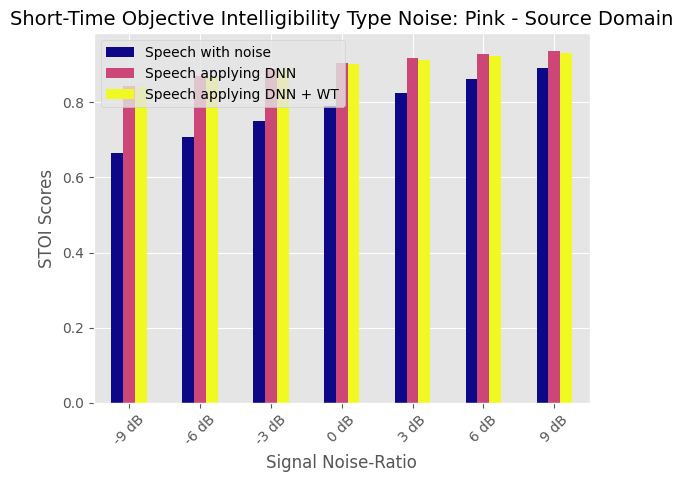

-------------------------------------------------------
nonstationary_crowd_party_adult_med
[[1.4207389450073242, 1.2809233725070954, 1.276906270980835], [1.3697433853149414, 1.1707123708724976, 1.1895538663864136], [1.3602332258224488, 1.2725523436069488, 1.3309951269626616], [1.3970026075839996, 1.4883965027332307, 1.6029664945602418], [1.497275241613388, 1.7170010352134704, 1.8899148833751678], [1.6189853262901306, 1.9481083703041078, 2.1826300060749055], [1.7788925445079804, 2.1389331316947935, 2.402758694887161]]


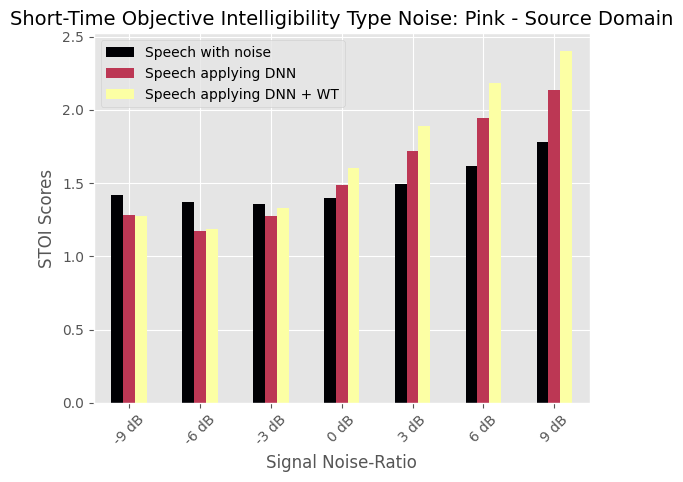

[[0.4618657034635544, 0.3644188619405031, 0.3689451087266207], [0.5243715637922287, 0.4990534545481205, 0.5024370813369751], [0.5968833076953888, 0.6428547939658165, 0.6434224137663841], [0.6726185017824173, 0.7586273312568664, 0.7565303438901901], [0.740056398510933, 0.8213312065601349, 0.8182119089365005], [0.796692721247673, 0.8633427351713181, 0.8607863771915436], [0.8457086580991745, 0.8904201066493989, 0.8883001536130906]]


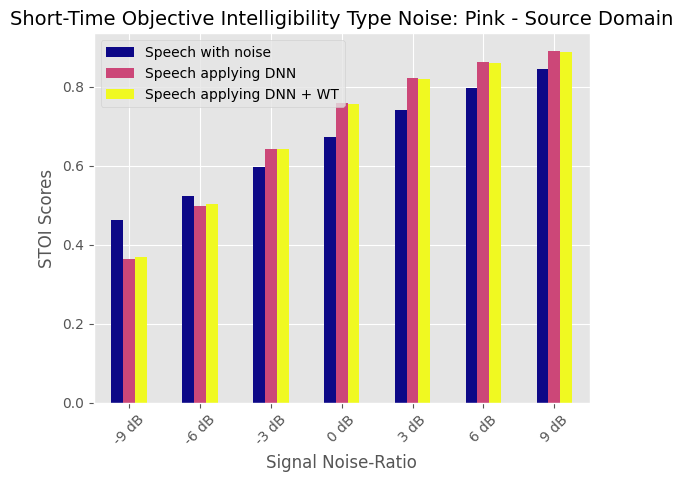

-------------------------------------------------------
nonstationary_bell_church
[[1.3955467450618744, 2.0231682419776917, 2.1288591289520262], [1.390981013774872, 2.2017696487903593, 2.3106202733516694], [1.440511735677719, 2.3952562606334684, 2.5039442706108095], [1.5279253482818604, 2.5767333483695984, 2.6862898015975953], [1.6341271233558654, 2.736965625286102, 2.845053141117096], [1.7698760282993318, 2.8643255949020388, 2.979059113264084], [1.9458269846439362, 2.9217548465728758, 3.045027747154236]]


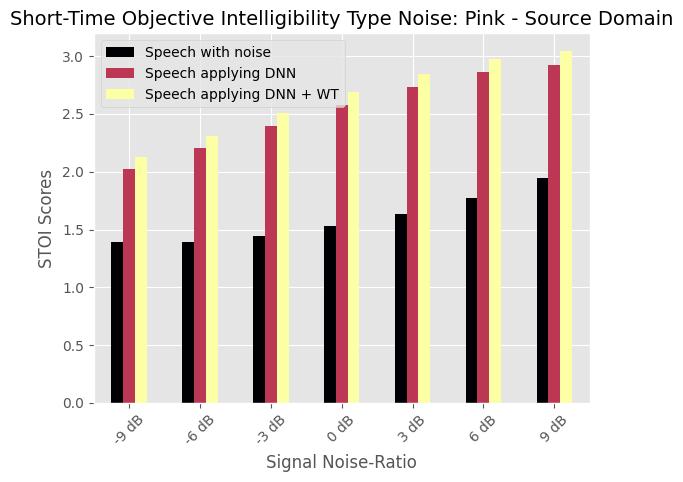

[[0.5740998619794846, 0.8523645848035812, 0.8498458474874496], [0.626051344871521, 0.8734688234329223, 0.8704312175512314], [0.6839310508966446, 0.8915553623437882, 0.8880837231874465], [0.7352706271409989, 0.905857322216034, 0.901446053981781], [0.7860260730981827, 0.9190710246562958, 0.9135633182525634], [0.831773157119751, 0.9286246454715729, 0.9224376845359802], [0.8705499190092086, 0.9358466291427612, 0.9288157904148102]]


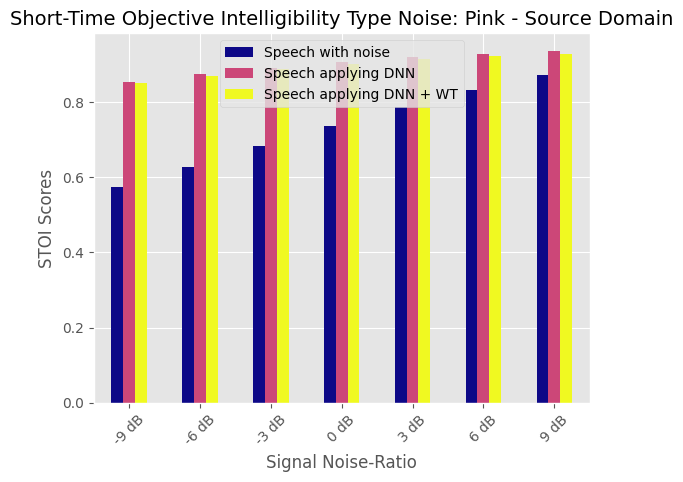

-------------------------------------------------------
nonstationary_cafeteria_babble
[[1.3285695731639862, 1.1270022404193878, 1.1515146255493165], [1.3479205548763276, 1.281088742017746, 1.3402029526233674], [1.2935339975357056, 1.477606040239334, 1.5820070254802703], [1.3686360621452331, 1.6934179806709289, 1.8372137248516083], [1.4789168870449065, 1.8987243366241455, 2.0954418778419495], [1.6295062077045441, 2.092176648378372, 2.335321981906891], [1.8050915944576262, 2.2632939159870147, 2.5487608122825622]]


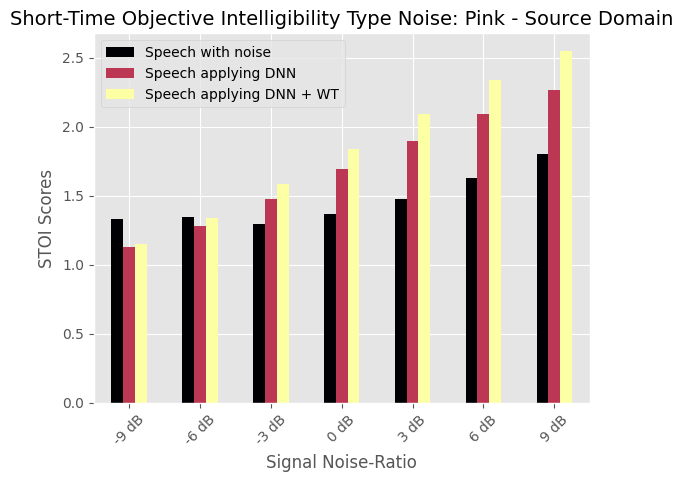

[[0.45363197684288026, 0.4534418721497059, 0.45699626572430135], [0.5129086577892303, 0.6037599593400955, 0.6041582538187504], [0.578363841176033, 0.7170756810903549, 0.7163243848085403], [0.6509071010351181, 0.7869292730093003, 0.7861414831876755], [0.7241561305522919, 0.8346980297565461, 0.833691589832306], [0.7858181262016296, 0.8693571519851685, 0.8674503552913666], [0.8378810089826584, 0.894317489862442, 0.8920119363069534]]


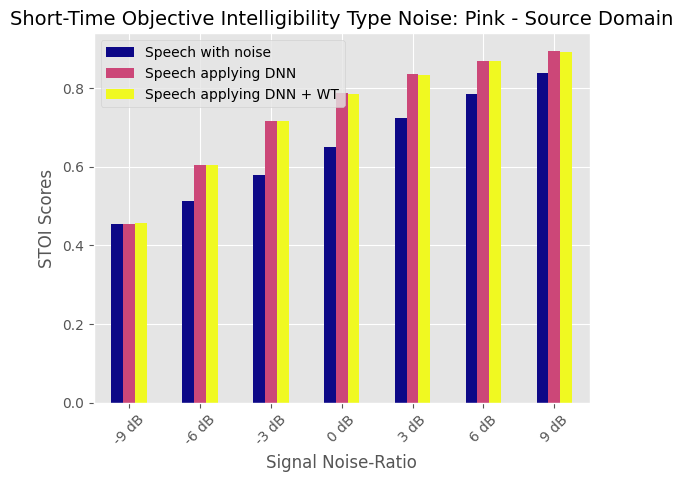

-------------------------------------------------------
nonstationary_helicopter
[[1.2268968856334685, 1.337939156293869, 1.38996386885643], [1.266724281311035, 1.5567525267601012, 1.6328817510604858], [1.3007051301002504, 1.7653566765785218, 1.8680870258808135], [1.3917046856880189, 1.9685738050937653, 2.104105259180069], [1.5100219357013702, 2.1515050518512724, 2.3153884971141814], [1.670561250448227, 2.319330526590347, 2.516733148097992], [1.8587558054924012, 2.4434559178352355, 2.691873638629913]]


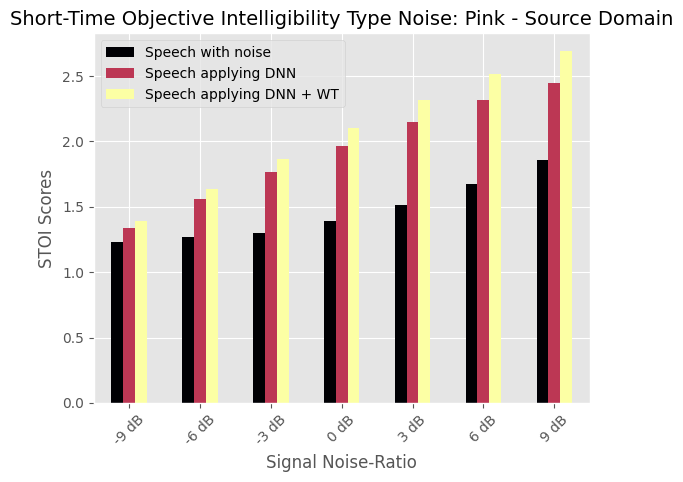

[[0.49076674818992616, 0.6454165521264076, 0.6437397983670234], [0.5435139948129654, 0.7197027605772018, 0.717600919008255], [0.6068177402019501, 0.7751414173841477, 0.7734462195634841], [0.6686270016431809, 0.8203170055150986, 0.8182588481903076], [0.7281556117534638, 0.8544397467374801, 0.8523349732160568], [0.7847976768016816, 0.881786767244339, 0.8788273078203201], [0.8343023175001144, 0.902022409439087, 0.8982723754644394]]


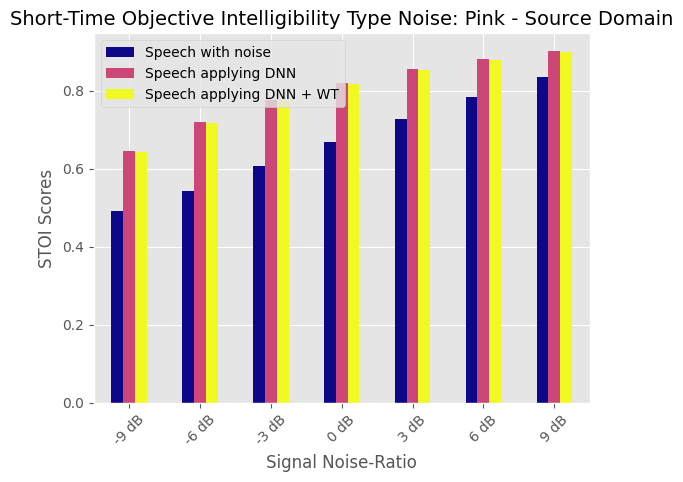

-------------------------------------------------------
nonstationary_people
[[1.796075665950775, 2.2721588015556335, 2.3296791672706605], [1.918851788043976, 2.436264462471008, 2.486109492778778], [2.0397964882850648, 2.5550870418548586, 2.59585556268692], [2.192859673500061, 2.678264327049255, 2.719286504983902], [2.3823539185523988, 2.770368137359619, 2.8240516388416292], [2.638591258525848, 2.8992506766319277, 2.9457748246192934], [2.8116603779792784, 2.908905177116394, 2.9427372097969053]]


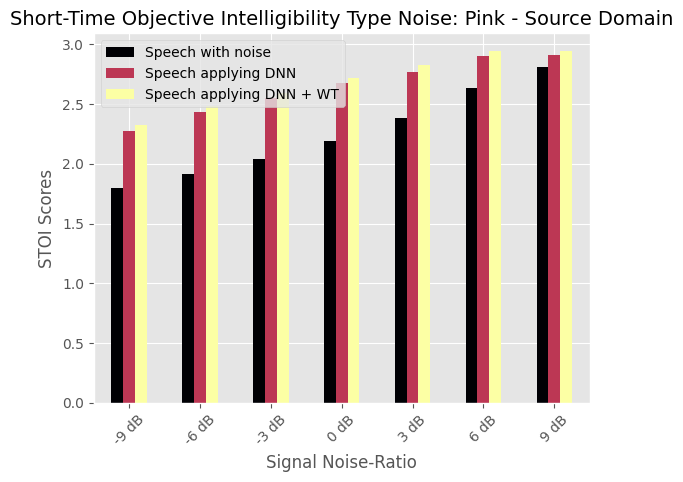

[[0.77230528652668, 0.8722736150026321, 0.8638623702526093], [0.7866570341587067, 0.8844454419612885, 0.8767689061164856], [0.7979580593109131, 0.8915236416459084, 0.8830094486474991], [0.8360501682758331, 0.9080567297339439, 0.8992016819119454], [0.8596564048528671, 0.9147948494553566, 0.9070586976408959], [0.9027413213253022, 0.932281283736229, 0.9238977587223053], [0.916289855837822, 0.931294914484024, 0.9217083972692489]]


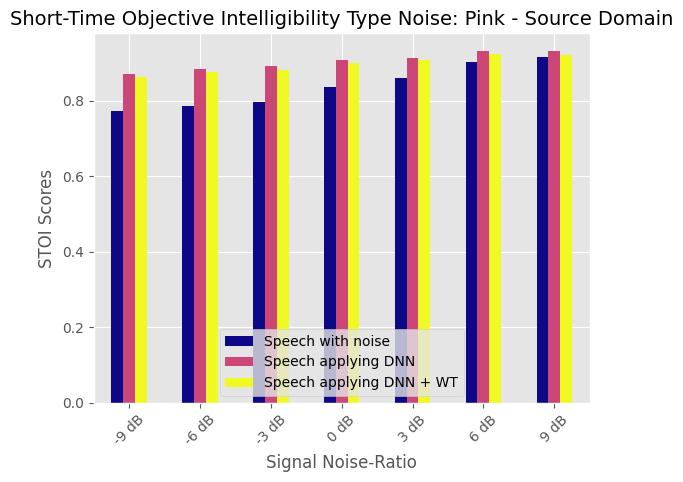

-------------------------------------------------------
nonstationary_dog_bark
[[1.5308738231658936, 2.2251693344116212, 2.362894946336746], [1.671052279472351, 2.408998281955719, 2.555386173725128], [1.8553506469726562, 2.556193073987961, 2.698047469854355], [2.059918383359909, 2.6850592517852783, 2.8266488552093505], [2.2814230346679687, 2.8123822593688965, 2.926768844127655], [2.469520709514618, 2.8858324122428893, 2.990158271789551], [2.694541573524475, 2.9842550587654113, 3.0777825832366945]]


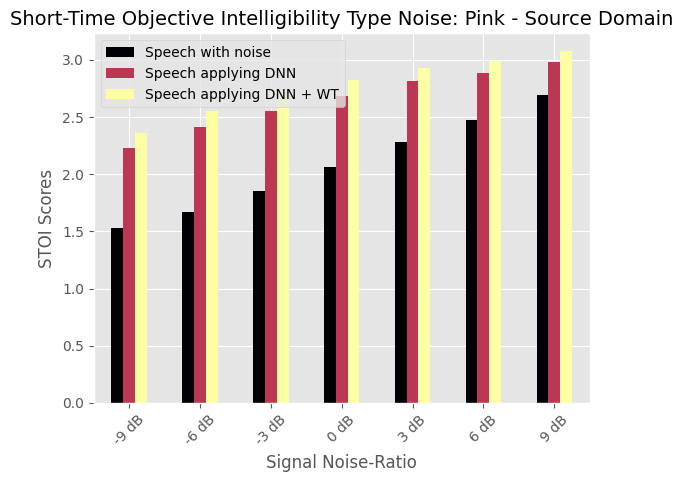

[[0.7413019520044327, 0.9042124289274216, 0.9014335900545121], [0.7840072727203369, 0.9189878714084625, 0.9151891487836837], [0.8214368712902069, 0.92815245449543, 0.9232133334875107], [0.8562530106306077, 0.9358932352066041, 0.9302077347040176], [0.8840482020378113, 0.94092498421669, 0.9341499483585358], [0.9066127097606659, 0.9443162250518798, 0.9371967893838883], [0.9264809781312943, 0.9487363934516907, 0.9406655788421631]]


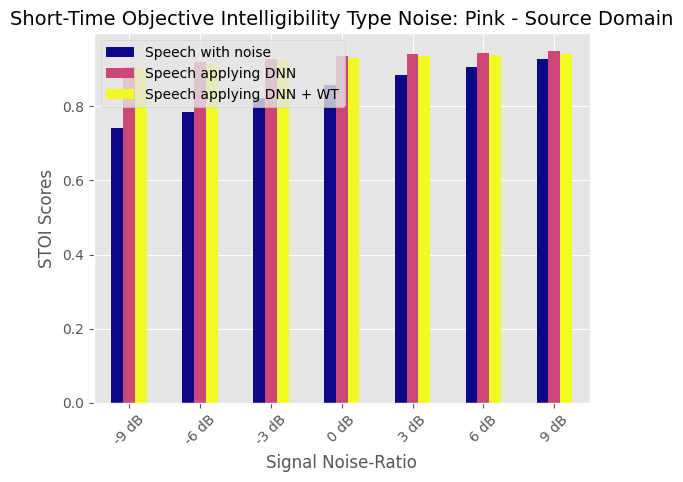

-------------------------------------------------------
stationary_pink
[[1.1864457988739014, 1.5604343175888062, 1.6550218486785888], [1.2311482799053193, 1.7269516026973724, 1.8555950760841369], [1.2991218233108521, 1.9308001732826232, 2.065158280134201], [1.3961082911491394, 2.1464115738868714, 2.291898435354233], [1.5291810655593872, 2.3686631214618683, 2.506664422750473], [1.702695939540863, 2.577315833568573, 2.691091001033783], [1.9181491231918335, 2.7632427048683166, 2.8490112090110777]]


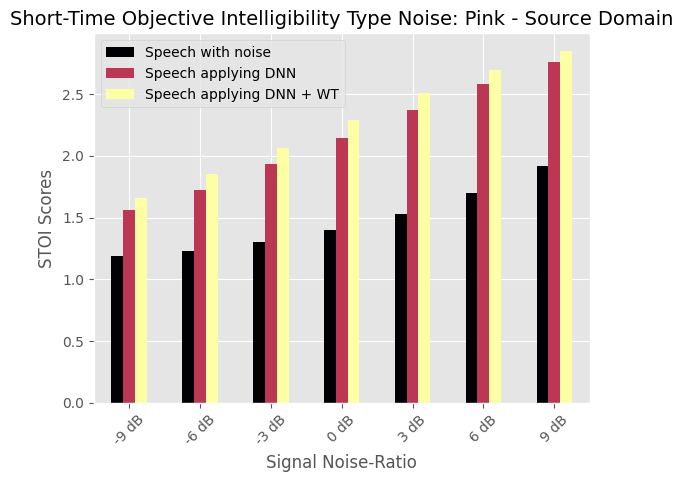

[[0.4963225489854813, 0.734594213962555, 0.73365935921669], [0.5587040036916733, 0.7870644611120224, 0.7859027802944183], [0.6291972610354424, 0.831546818614006, 0.8284763991832733], [0.6991389328241349, 0.863272265791893, 0.8605822956562043], [0.766683856844902, 0.8882761389017105, 0.8854646998643875], [0.8227127933502197, 0.9063191360235214, 0.9034703987836837], [0.8673867100477218, 0.9206049031019211, 0.9183177483081818]]


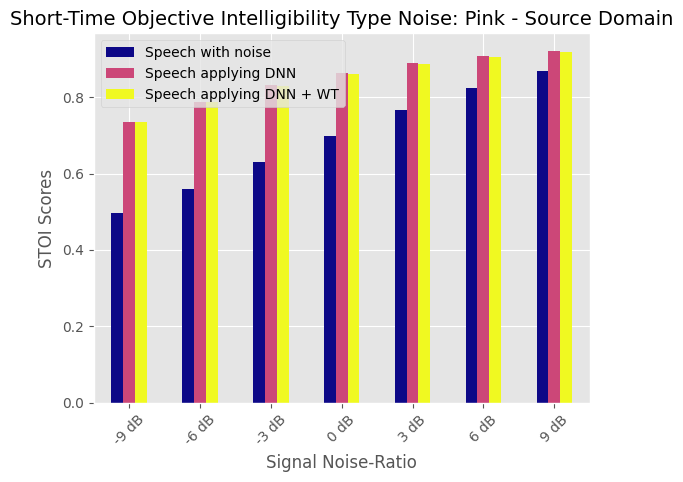

-------------------------------------------------------
stationary_dripping_water
[[1.1661224234104157, 2.2796252846717833, 2.398373678922653], [1.2060467672348023, 2.534371600151062, 2.6543332171440124], [1.269320867061615, 2.73398001909256, 2.8325647616386416], [1.3500363850593566, 2.9136995673179626, 2.9885303473472593], [1.4634169828891754, 3.063638563156128, 3.106813733577728], [1.593429423570633, 3.17410254240036, 3.2059752464294435], [1.76771742105484, 3.2094999241828917, 3.2417983078956603]]


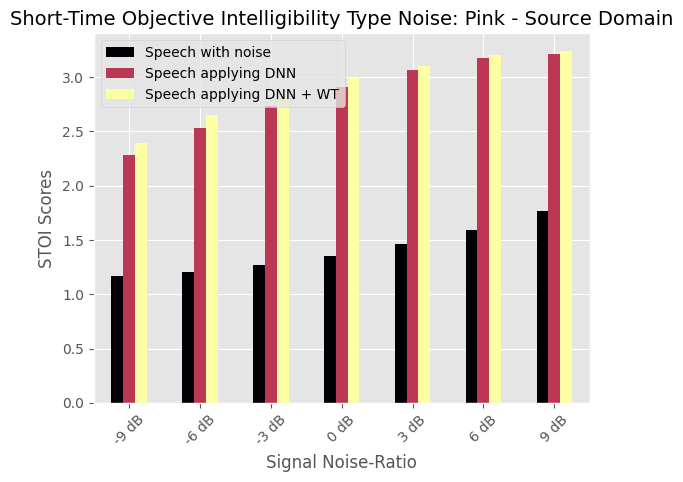

[[0.5320411711931229, 0.8801794099807739, 0.8774537092447281], [0.5999856847524643, 0.900327382683754, 0.8973458832502366], [0.6652370965480805, 0.9158675247430801, 0.9121116638183594], [0.7242031526565552, 0.9275644570589066, 0.9232411205768585], [0.7781717538833618, 0.9365971821546555, 0.9316937029361725], [0.8227462357282639, 0.9440430963039398, 0.9383553814888], [0.8609297561645508, 0.9489012986421586, 0.9421300959587097]]


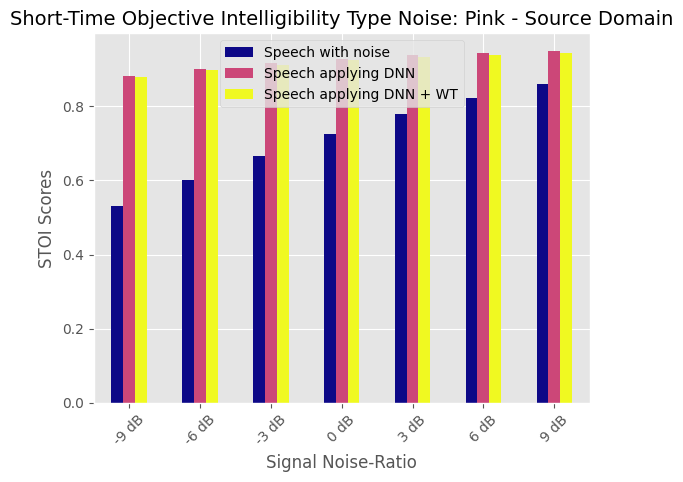

-------------------------------------------------------
stationary_car
[[1.283935889005661, 1.8616210961341857, 1.9742896568775177], [1.3623883259296417, 2.0665257954597473, 2.1912939810752867], [1.469364995956421, 2.2752352130413054, 2.418310424089432], [1.6037791764736176, 2.462600737810135, 2.606751937866211], [1.7694991445541381, 2.6672663712501525, 2.7967565953731537], [1.967898243665695, 2.8373793005943297, 2.9642756533622743], [2.1939951038360594, 2.9775105023384096, 3.092939441204071]]


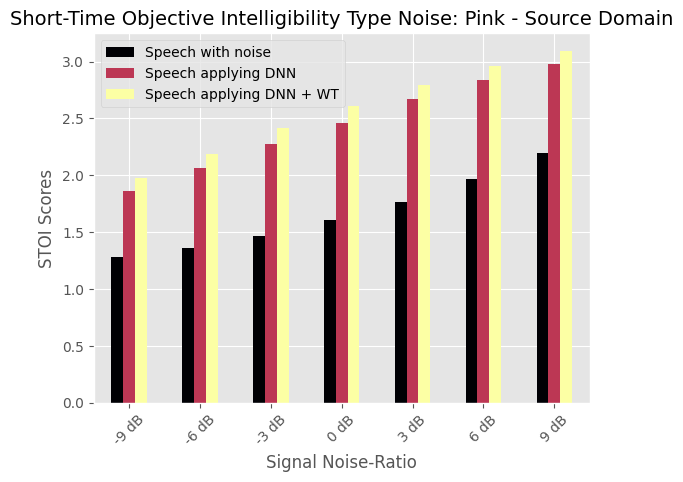

[[0.6548159444332122, 0.7859464114904404, 0.7805910956859589], [0.6917348372936248, 0.8181926780939102, 0.8126905655860901], [0.7273525679111481, 0.845121459364891, 0.8387147253751754], [0.7646586036682129, 0.8680336821079254, 0.8613563144207], [0.802329129576683, 0.8898098266124725, 0.8825309103727341], [0.8381836646795273, 0.9076439625024796, 0.900512062907219], [0.8715590578317642, 0.9218708384037018, 0.9143042105436325]]


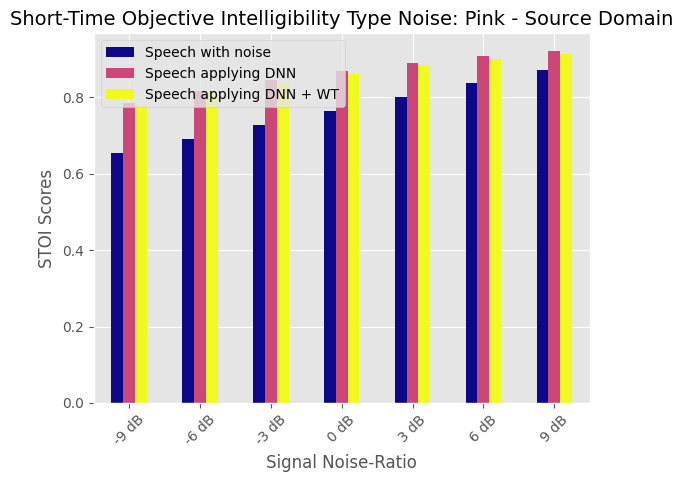

-------------------------------------------------------
stationary_cabin
[[1.231339646577835, 1.6740869295597076, 1.7900750648975372], [1.303445646762848, 1.910699623823166, 2.0692856335639953], [1.4186833953857423, 2.169823845624924, 2.347694374322891], [1.5679043221473694, 2.4047811961174013, 2.587531090974808], [1.7491079354286194, 2.6267453145980837, 2.801826305389404], [1.9713659060001374, 2.8328840351104736, 2.9845929861068727], [2.2267415106296538, 3.0226223945617674, 3.1379004740715026]]


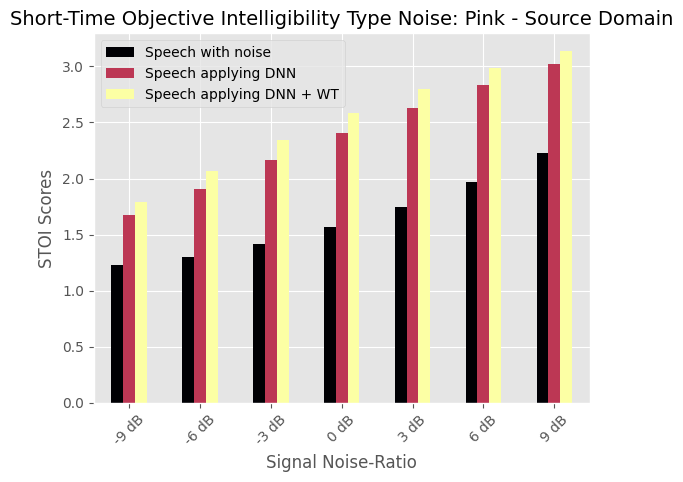

[[0.6052539074420928, 0.7606986218690872, 0.7579980319738389], [0.656090697646141, 0.8048413717746734, 0.8015920555591584], [0.7065419030189514, 0.841252767443657, 0.8372071319818497], [0.7543525129556656, 0.8703560554981231, 0.8664069336652755], [0.7991654479503632, 0.8937802201509476, 0.8894987517595291], [0.8397506779432297, 0.9116567516326904, 0.9069474476575852], [0.874262780547142, 0.9253201127052307, 0.9197914582490921]]


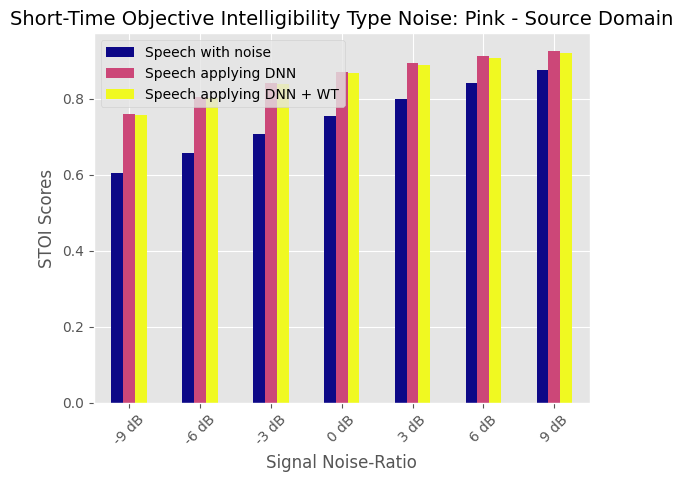

-------------------------------------------------------
stationary_rain
[[1.223660261631012, 1.4761004483699798, 1.5645367538928985], [1.219568076133728, 1.6597885060310364, 1.7715477561950683], [1.2635332238674164, 1.8529832243919373, 1.9865713286399842], [1.3327292108535767, 2.060527591705322, 2.2052825510501863], [1.4374681890010834, 2.2505351853370668, 2.411527917385101], [1.5820988273620606, 2.4401386415958406, 2.6155316710472105], [1.7707530844211579, 2.6252354407310485, 2.7864423775672913]]


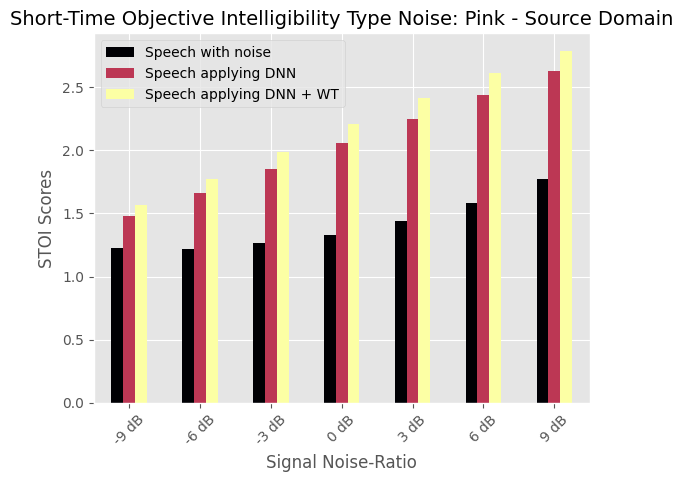

[[0.4736411264538765, 0.7156812667846679, 0.7151290655136109], [0.5356374263763428, 0.7721523857116699, 0.7713057422637939], [0.6065992894768715, 0.8192157882452011, 0.8175160759687423], [0.6748575949668885, 0.854022536277771, 0.8511610543727874], [0.7446010440587998, 0.878500919342041, 0.8759464579820633], [0.8040162360668183, 0.899897404909134, 0.8971635830402375], [0.8534858202934266, 0.9154490870237351, 0.9130205088853836]]


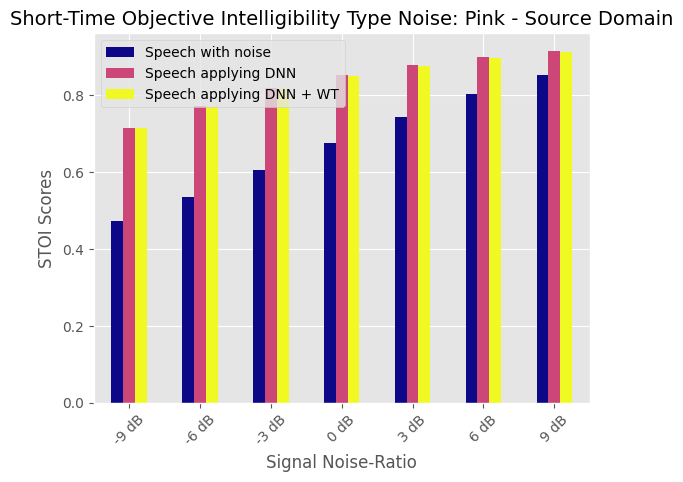

-------------------------------------------------------
stationary_wind
[[1.3145287418365479, 1.9061345446109772, 1.9946311616897583], [1.4094653344154358, 2.1612993156909943, 2.277028988599777], [1.5300742268562317, 2.3997092938423155, 2.5244133460521696], [1.6882271587848663, 2.6095554280281066, 2.7300718688964842], [1.882606544494629, 2.818307521343231, 2.92164493560791], [2.113955883979797, 2.9981744742393492, 3.0793953919410706], [2.3805213713645936, 3.1695695424079897, 3.2205324220657348]]


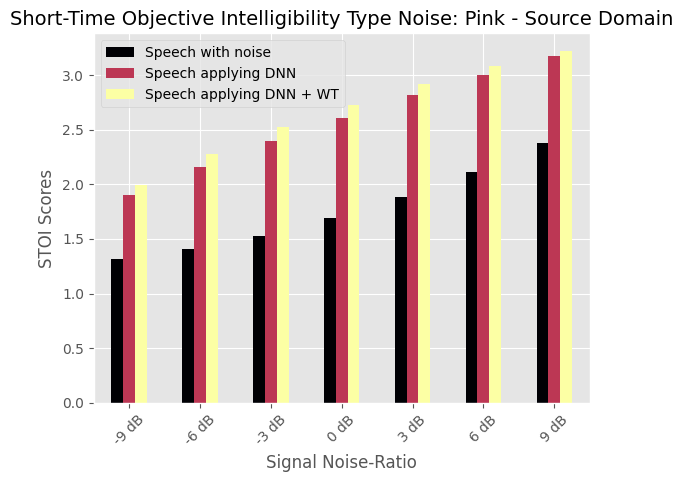

[[0.6435686275362968, 0.8120375925302505, 0.8078183138370514], [0.693971619606018, 0.8442377096414566, 0.8396623969078064], [0.7426898157596589, 0.8721614223718643, 0.8672637796401977], [0.7873827451467514, 0.8921790081262588, 0.8870250397920608], [0.8289548027515411, 0.9103044033050537, 0.9044198209047317], [0.8642671418190002, 0.924532122015953, 0.9178852492570877], [0.8934842538833618, 0.9355611747503281, 0.9286954110860824]]


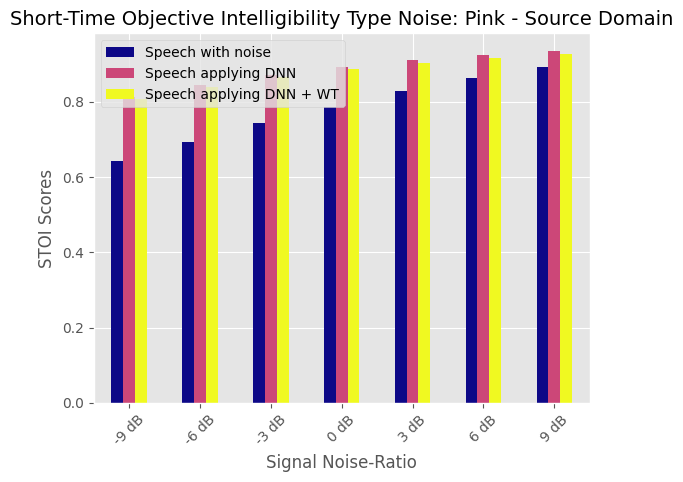

-------------------------------------------------------
stationary_typing
[[1.1005919146537781, 2.1430276012420655, 2.2259392666816713], [1.1264033424854278, 2.32877454161644, 2.4293219435214994], [1.163252044916153, 2.482397530078888, 2.5810064589977264], [1.2221837759017944, 2.6284342908859255, 2.7179178762435914], [1.3169724249839783, 2.7314534091949465, 2.8140265130996704], [1.4459886479377746, 2.8197703051567076, 2.8856547546386717], [1.6334226274490355, 2.887373387813568, 2.9403612565994264]]


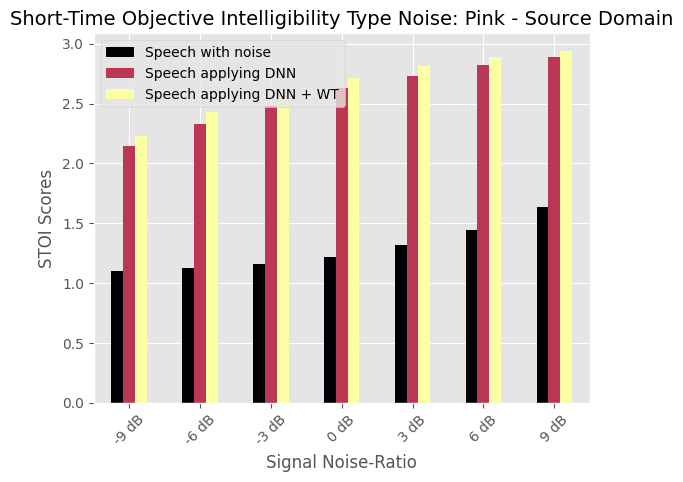

[[0.5344718104600906, 0.8649826687574387, 0.8629388397932053], [0.596883051097393, 0.8876263093948364, 0.8848636722564698], [0.6562236279249192, 0.9037820595502853, 0.9000201219320297], [0.7151540929079055, 0.9165120977163315, 0.912593594789505], [0.7665265625715256, 0.9260633158683776, 0.921420328617096], [0.8112126404047012, 0.9330513483285904, 0.9278296566009522], [0.8501723110675812, 0.9389194601774216, 0.9331180465221405]]


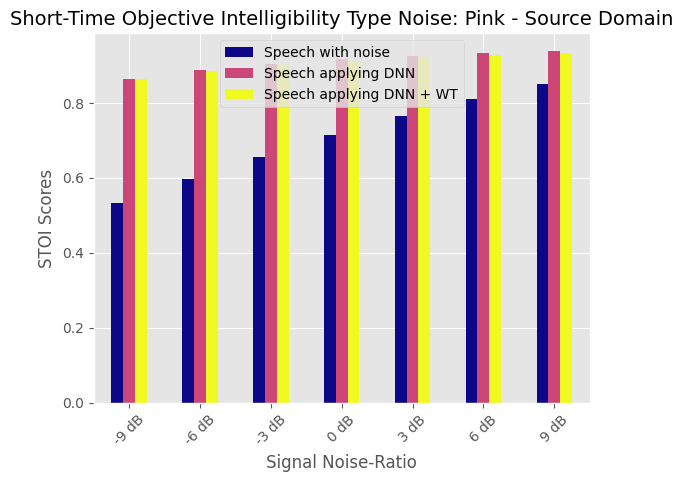

-------------------------------------------------------


In [14]:
NAME_NOISES_DICTIONARY = scores_per_noise_dictionary.keys()
DB_FINALS = [-9, -6, -3, 0, 3, 6, 9]

for name_noise in NAME_NOISES_DICTIONARY:
    PESQ_SCORES_DICT = []
    STOI_SCORES_DICT = []
    count = 0
    print(name_noise)
    for i in range(len(scores_per_noise_dictionary[name_noise])):
        #print(DB_FINALS[count])
        #dictionary_pesq[DB_FINALS[count]].append(scores_per_noise_dictionary[name_noise][i][0])
        #dictionary_stoi[DB_FINALS[count]].append(scores_per_noise_dictionary[name_noise][i][1])
        #print(scores_per_noise_dictionary[name_noise][i][0])
        #print(scores_per_noise_dictionary[name_noise][i][1])
        PESQ_SCORES_DICT.append(scores_per_noise_dictionary[name_noise][i][0])
        STOI_SCORES_DICT.append(scores_per_noise_dictionary[name_noise][i][1])
        count += 1
    #print(PESQ_SCORES_DICT)
    #print(STOI_SCORES_DICT)
    
    
    # Ejemplo de uso con tu lista de ejemplo
    dataPESQ = PESQ_SCORES_DICT
    dataSTOI = STOI_SCORES_DICT
    
    print(dataPESQ)
    plot_scores(dataPESQ, config={
        'noise_type': 'Type Noise: Pink - Source Domain', 
        'title' : 'Short-Time Objective Intelligibility',
        'metric' : 'STOI Scores', 'color' : 'inferno'})
    print(dataSTOI)
    plot_scores(dataSTOI, config={
        'noise_type': 'Type Noise: Pink - Source Domain', 
        'title' : 'Short-Time Objective Intelligibility',
        'metric' : 'STOI Scores', 'color' : 'plasma'})
    
    
    print('-------------------------------------------------------')
    #break

In [73]:
def plot_curves_loss(label_x, label_y, title_plot, lengend_plot_train, legend_plot_val, data1, data2, color_t, color_v):
    plt.style.use('seaborn')
    x = [x+1 for x in range(len(data1))]
    y = np.array(data2)
    plt.plot([x+1 for x in range(len(data1))], data1, label = str(lengend_plot_train), color=color_t)
    plt.plot([x+1 for x in range(len(data2))], data2, label = str(legend_plot_val), color=color_v)
    plt.fill_between(x, y, y + 0.002, color=color_v, alpha=0.2)  # Ajusta el valor de 0.5 según tus necesidades
    plt.fill_between(x, y, y - 0.002, color=color_v, alpha=0.2)  # Ajusta el valor de 0.5 según tus necesidades
    plt.ylabel(str(label_y), fontsize = 14)
    plt.xlabel(str(label_x), fontsize = 14)
    plt.title(str(title_plot), fontsize = 18, y = 1.03)
    plt.legend()
    plt.show()

In [74]:
LOSS_TRAIN_MSE_S = util.load_variables('stastics/LOSS_TRAIN_MSE_S.pkl')
LOSS_VAL_MSE_S = util.load_variables('stastics/LOSS_VAL_MSE_S.pkl')
LOSS_TRAIN_MSE_T = util.load_variables('stastics/LOSS_TRAIN_MSE_S.pkl')
LOSS_VAL_MSE_T = util.load_variables('stastics/LOSS_VAL_MSE_S.pkl')
TIME = util.load_variables('stastics/LOSS_TRAIN_MSE_S.pkl')

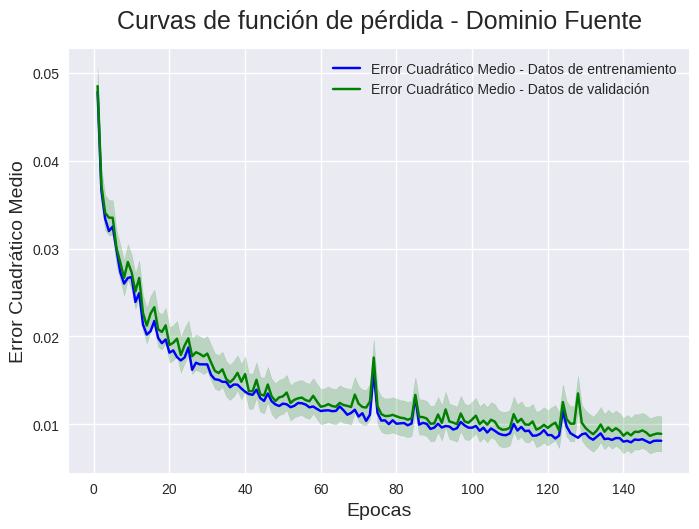

In [75]:
plot_curves_loss('Epocas', 'Error Cuadrático Medio', 'Curvas de función de pérdida - Dominio Fuente', 'Error Cuadrático Medio - Datos de entrenamiento', 'Error Cuadrático Medio - Datos de validación', LOSS_TRAIN_MSE_T, LOSS_VAL_MSE_T, 'blue', 'green')

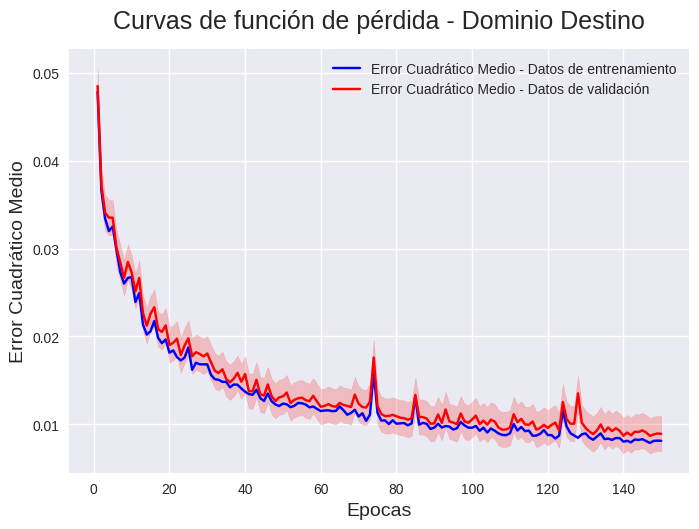

In [76]:
plot_curves_loss('Epocas', 'Error Cuadrático Medio', 'Curvas de función de pérdida - Dominio Destino', 'Error Cuadrático Medio - Datos de entrenamiento', 'Error Cuadrático Medio - Datos de validación', LOSS_TRAIN_MSE_S, LOSS_VAL_MSE_S, 'blue', 'red')

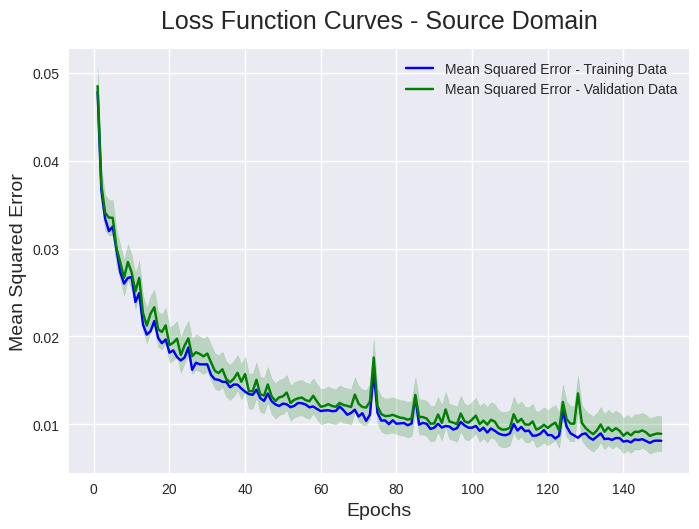

In [77]:
plot_curves_loss('Epochs', 'Mean Squared Error', 'Loss Function Curves - Source Domain', 'Mean Squared Error - Training Data', 'Mean Squared Error - Validation Data', LOSS_TRAIN_MSE_T, LOSS_VAL_MSE_T, 'blue', 'green')

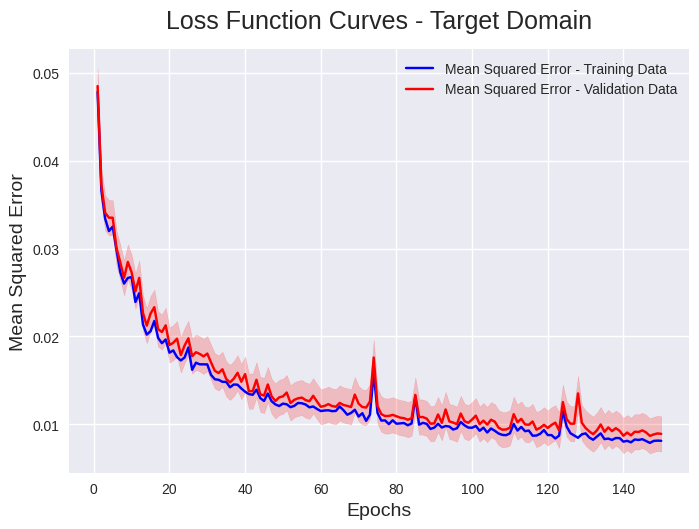

In [78]:
plot_curves_loss('Epochs', 'Mean Squared Error', 'Loss Function Curves - Target Domain', 'Mean Squared Error - Training Data', 'Mean Squared Error - Validation Data', LOSS_TRAIN_MSE_S, LOSS_VAL_MSE_S, 'blue', 'red')

In [79]:
def get_plot_wer(wer_clean, wer_noise, wer_dnn, wer_wt, if_english, title_noise):
    markers = ['o', 's', 'D', '^', 'v']
    x = ['-9 dB', '-6 dB', '-3 dB', '0 dB', '3 dB', '6 dB', '9 dB']
    plt.style.use('seaborn')
    
    if(if_english):
        plt.plot(x, wer_clean, color='springgreen', marker=markers[0], linestyle='dashed', linewidth=1.3, markersize=7, label = str('Base Audio'))
        plt.plot(x, wer_noise, color='red', marker=markers[1], linestyle='dashed', linewidth=1.3, markersize=7, label = str('Base Audio + Noise'))
        plt.plot(x, wer_dnn, color='darkslategray', marker=markers[2], linestyle='dashed', linewidth=1.3, markersize=7, label = str('Denoised Audio with DNN'))
        plt.plot(x, wer_wt, color='dodgerblue', marker=markers[3], linestyle='dashed', linewidth=1.3, markersize=7, label = str('Denoised Audio with DNN + WT'))
        plt.xlabel('Signal Noise-Ratio', fontsize = 14)
        plt.ylabel('Word Error Rate', fontsize = 14)
        plt.title('Word Error Rate - Noise Type: '+str(title_noise), fontsize = 16)
    else:
        plt.plot(x, wer_clean, color='springgreen', marker=markers[0], linestyle='dashed', linewidth=1.3, markersize=7, label = str('Audio Base'))
        plt.plot(x, wer_noise, color='red', marker=markers[1], linestyle='dashed', linewidth=1.3, markersize=7, label = str('Audio Base + Ruido'))
        plt.plot(x, wer_dnn, color='darkslategray', marker=markers[2], linestyle='dashed', linewidth=1.3, markersize=7, label = str('Eliminación de Ruido con RNP'))
        plt.plot(x, wer_wt, color='dodgerblue', marker=markers[3], linestyle='dashed', linewidth=1.3, markersize=7, label = str('Eliminación de Ruido con RNP + TW'))
        plt.xlabel('Relación Señal-Ruido', fontsize = 14)
        plt.ylabel('Tasa de Error de Palabras', fontsize = 14)
        plt.title('Tasa de Error de Palabras - Tipo de Ruido: '+str(title_noise), fontsize = 16)
    
    #plt.ylim(-0.1, 1)
    #plt.yticks(range(0, 1, 0.1))

    plt.legend(loc='upper right')

    # Mostrar la gráfica
    plt.show()

In [80]:
def get_item_wer(PATH, RE, type_noise):
    # Dictionary to store filenames per category
    file_categories = {}
    # Given path to WER noise files
    PATH_WER_NOISE = PATH
    # Regular expression pattern to extract category and dB value
    pattern = r''+type_noise+'_(\w+)_(-?\d+)'+str(RE)+'.pkl'
    # Iterate over sorted filenames
    for wer_db in sorted(os.listdir(PATH_WER_NOISE)):
        # Extract category and dB value from filename
        match = re.match(pattern, wer_db)
        if match:
            category = match.group(1)
            filename = match.group(0)
            # Check if category exists in dictionary
            if category in file_categories:
                file_categories[category].append(filename)
            else:
                file_categories[category] = [filename]
    # Sort filenames within each category by dB value
    for category, filenames in file_categories.items():
        file_categories[category] = sorted(filenames, key=lambda x: int(re.search(pattern, x).group(2)))
    return file_categories

In [81]:
file_categories_noise_ns = get_item_wer('shared1/', 'db_noise', 'nonstationary')
file_categories_dnn_ns = get_item_wer('shared2/', 'db_dnn', 'nonstationary')
file_categories_wt_ns = get_item_wer('shared3/', 'db_dnn_wt', 'nonstationary')

In [82]:
file_categories_noise_wt = get_item_wer('shared1/', 'db_noise', 'stationary')
file_categories_dnn_wt = get_item_wer('shared2/', 'db_dnn', 'stationary')
file_categories_wt_wt = get_item_wer('shared3/', 'db_dnn_wt', 'stationary')

Category: babycry
Category: babycry
Category: babycry


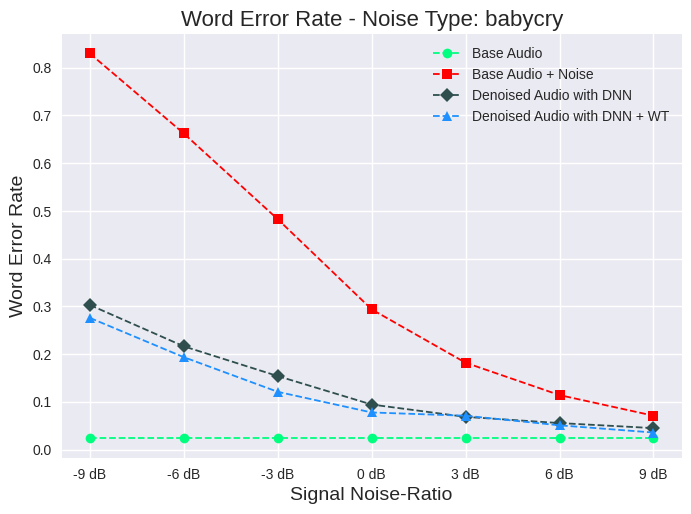


Category: bell_church
Category: bell_church
Category: bell_church


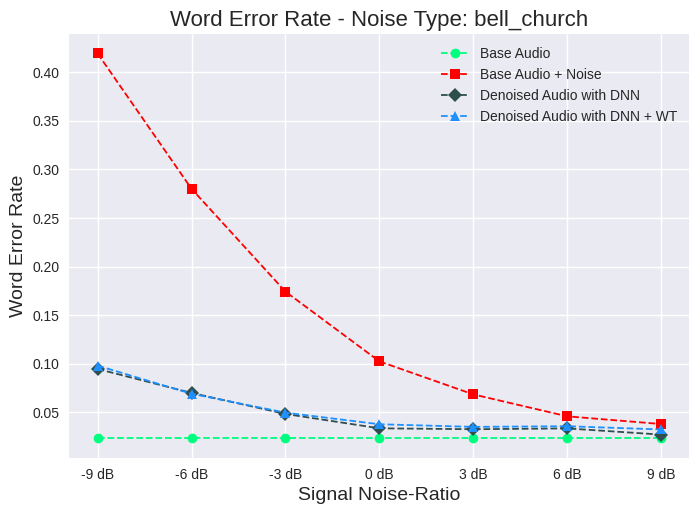


Category: cafeteria_babble
Category: cafeteria_babble
Category: cafeteria_babble


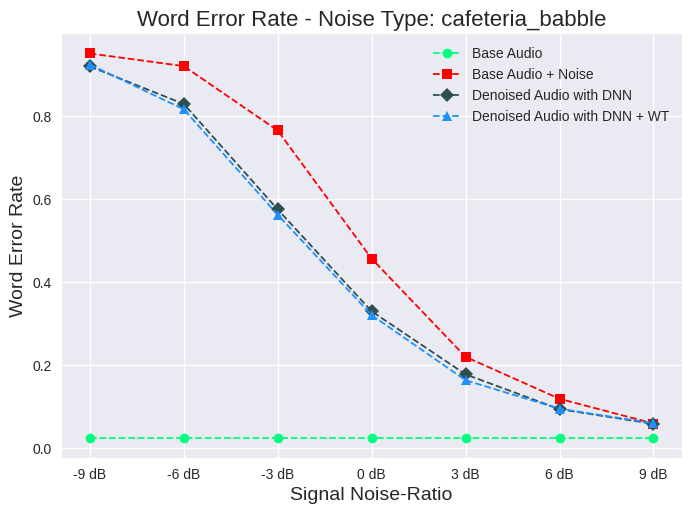


Category: crowd_party_adult_med
Category: crowd_party_adult_med
Category: crowd_party_adult_med


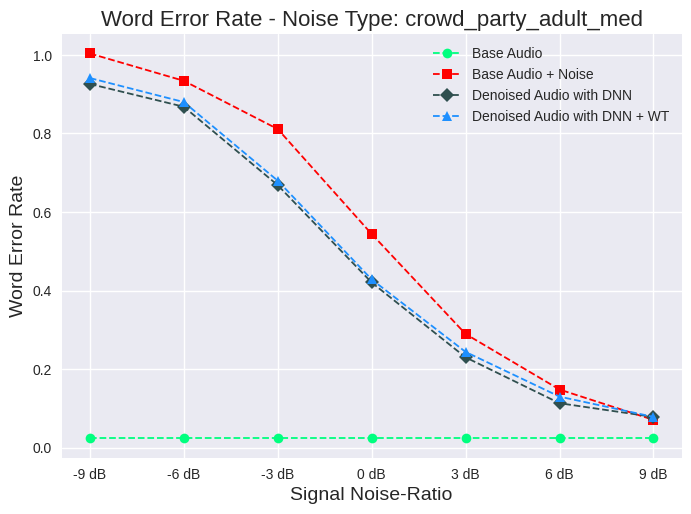


Category: dog_bark
Category: dog_bark
Category: dog_bark


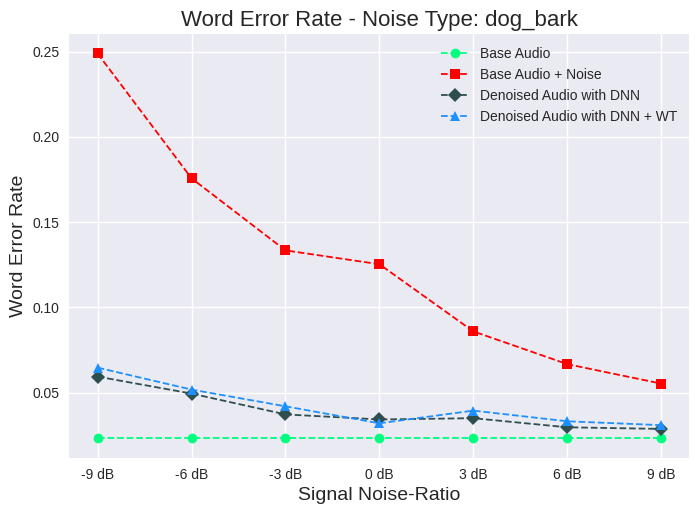


Category: helicopter
Category: helicopter
Category: helicopter


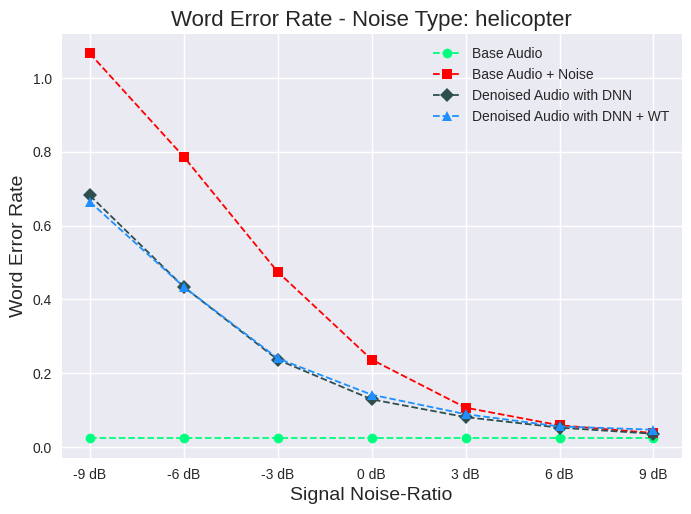


Category: people
Category: people
Category: people


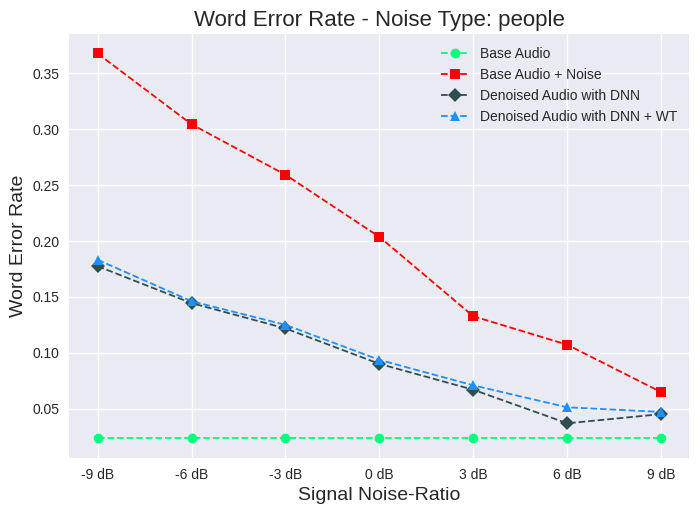

In [92]:
# Print filenames per category sorted by dB value
count_aux = 0
for idx, (dict1, dict2, dict3) in enumerate(zip(file_categories_noise_ns.items(), file_categories_dnn_ns.items(), file_categories_wt_ns.items())):
    category1 = dict1[0]
    filenames1 = dict1[1]
    
    category2 = dict2[0]
    filenames2 = dict2[1]
    
    category3 = dict3[0]
    filenames3 = dict3[1]
    
    
    WERS_NOISE = []
    WERS_DNN = []
    WERS_DNN_TW = []
    print(f"Category: {category1}")
    for filename in filenames1:
        WER = util.load_variables(os.path.join('shared1/', filename))
        WERS_NOISE.append(WER)
    print(f"Category: {category2}")    
    for filename in filenames2:
        WER = util.load_variables(os.path.join('shared2/', filename))
        WERS_DNN.append(WER)
    print(f"Category: {category3}")    
    for filename in filenames3:
        WER = util.load_variables(os.path.join('shared3/', filename))
        WERS_DNN_TW.append(WER)
        

    
    WER_CLEAN = [0.0232 for i in range(7)]
    WER_CLEAN = np.array(WER_CLEAN)
    WERS_NOISE = np.array(WERS_NOISE)
    WERS_DNN = np.array(WERS_DNN)
    WERS_DNN_TW = np.array(WERS_DNN_TW)
    
    get_plot_wer(WER_CLEAN, WERS_NOISE, WERS_DNN, WERS_DNN_TW, True, category1)
    print()
    #break""""""

Category: cabin
Category: cabin
Category: cabin


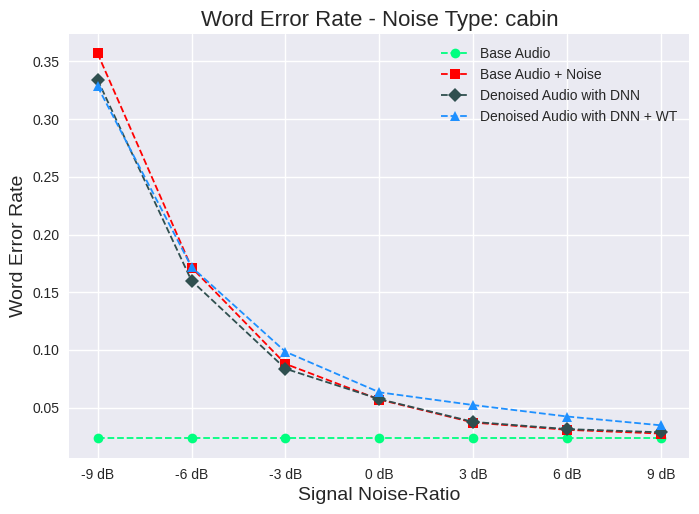


Category: car
Category: car
Category: car


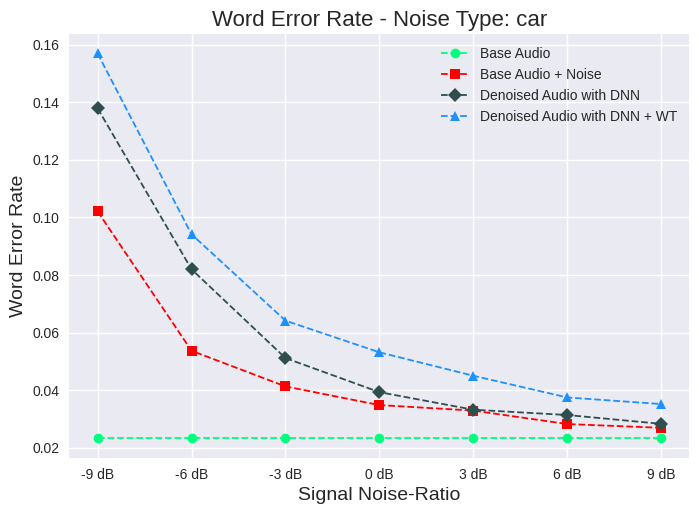


Category: dripping_water
Category: dripping_water
Category: dripping_water


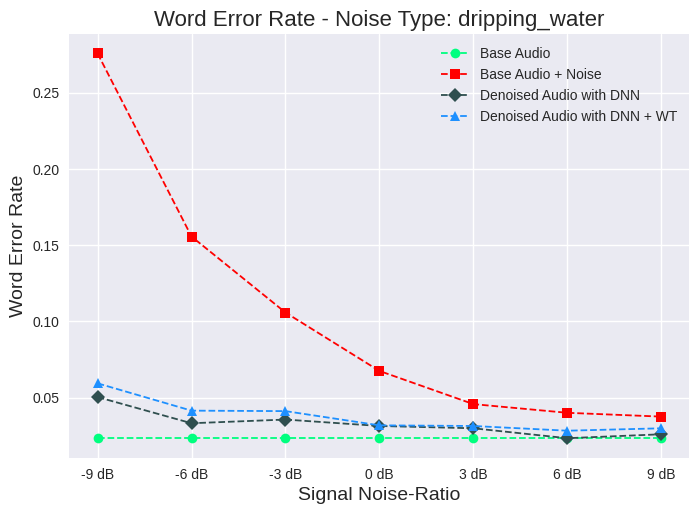


Category: pink
Category: pink
Category: pink


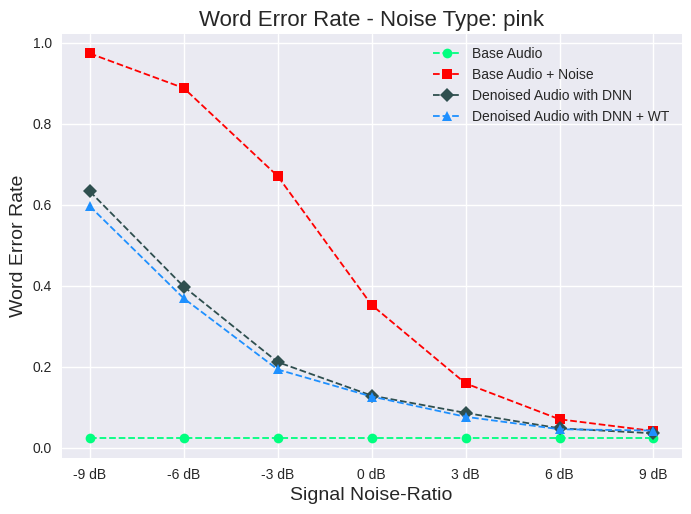


Category: rain
Category: rain
Category: rain


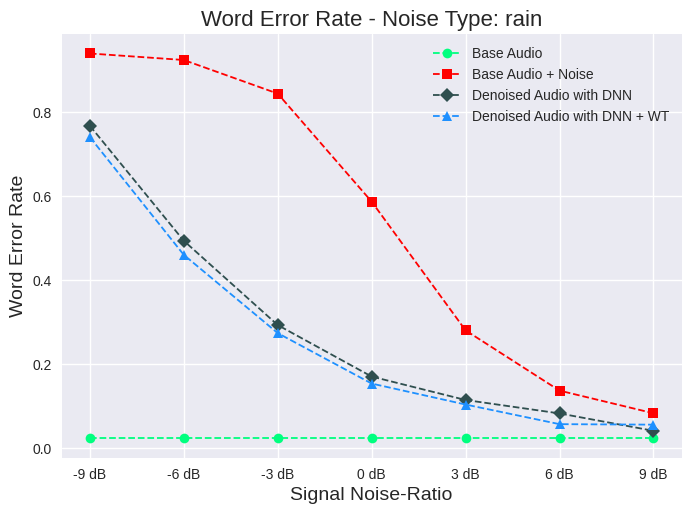


Category: typing
Category: typing
Category: typing


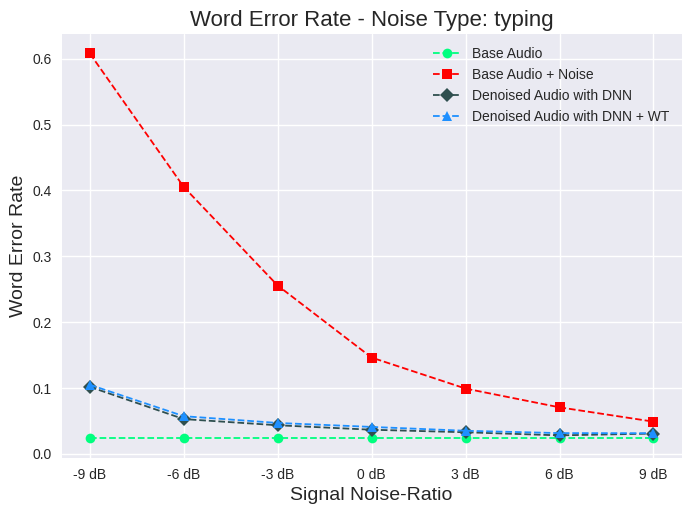


Category: wind
Category: wind
Category: wind


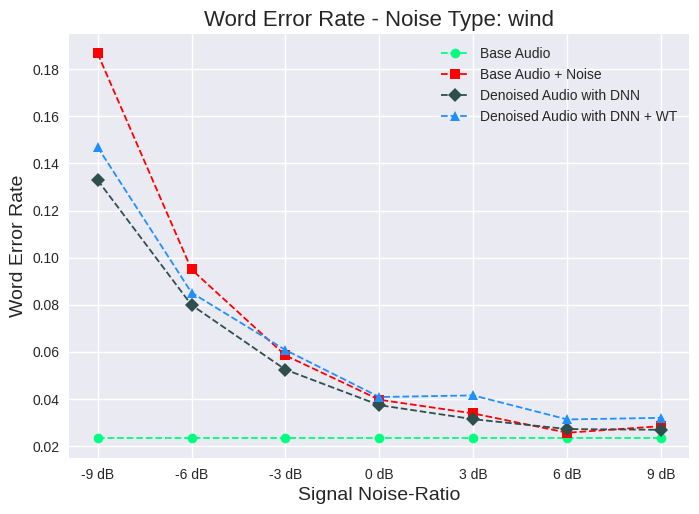

In [93]:
# Print filenames per category sorted by dB value
count_aux = 0
for idx, (dict1, dict2, dict3) in enumerate(zip(file_categories_noise_wt.items(), file_categories_dnn_wt.items(), file_categories_wt_wt.items())):
    category1 = dict1[0]
    filenames1 = dict1[1]
    
    category2 = dict2[0]
    filenames2 = dict2[1]
    
    category3 = dict3[0]
    filenames3 = dict3[1]
    
    
    
    
    WERS_NOISE = []
    WERS_DNN = []
    WERS_DNN_TW = []
    print(f"Category: {category1}")
    for filename in filenames1:
        WER = util.load_variables(os.path.join('shared1/', filename))
        WERS_NOISE.append(WER)
    print(f"Category: {category2}")    
    for filename in filenames2:
        WER = util.load_variables(os.path.join('shared2/', filename))
        WERS_DNN.append(WER)
    print(f"Category: {category3}")    
    for filename in filenames3:
        WER = util.load_variables(os.path.join('shared3/', filename))
        WERS_DNN_TW.append(WER)
        

    
    WER_CLEAN = [0.0232 for i in range(7)]
    WER_CLEAN = np.array(WER_CLEAN)
    WERS_NOISE = np.array(WERS_NOISE)
    WERS_DNN = np.array(WERS_DNN)
    WERS_DNN_TW = np.array(WERS_DNN_TW)
    
    get_plot_wer(WER_CLEAN, WERS_NOISE, WERS_DNN, WERS_DNN_TW, True, category1)
    print()
    #break""""""